In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Input

In [14]:
# Hàm số f(x, y)
# giá trị ban đầu: x0, y0
# Số mốc x_k sử dụng: N
# Giá trị X: cần tính giá trị hàm y tại x = X
def Function(x, y):
    return x + y

x0 = 0
y0 = 1
N = 10
X = 1

# Các hàm tính theo công thức Euler forward, euler backward, euler hình thang

In [15]:
def EulerForWard(x0, X, y0, N):
    result = []
    h = (X - x0) / (N - 1)
    result.append(y0)
    for i in range(1, N):
        y0 = y0 + h * Function(x0, y0)
        result.append(y0)
        x0 += h
    return result

In [16]:
def EulerBackward(x0, X, y0, N):
    result = []
    h = (X - x0) / (N - 1)
    result.append(y0)
    for i in range(1, N):
        yTem = y0 + h * Function(x0, y0)
        y0 = y0 + h * Function(x0 + h, yTem)
        result.append(y0)
        x0 += h
    return result

In [17]:
def EulerHinhThang(x0, X, y0, N):
    result = []
    h = (X - x0) / (N - 1)
    result.append(y0)
    for i in range(1, N):
        yTem = y0 + h * Function(x0, y0)
        y0 = y0 + (h / 2) * (Function(x0, y0) + Function(x0 + h, yTem))
        result.append(y0)
        x0 += h
    return result

# Vẽ đồ thị so sánh kết quả chạy công thức Euler hiện với nghiệm đúng

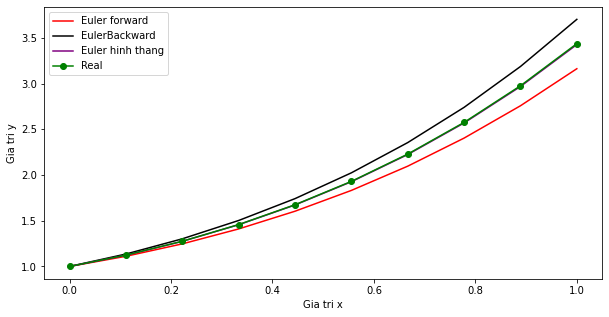

In [18]:
resultEulerForWard = EulerForWard(x0, X, y0, N)
resultEulerBackWard = EulerBackward(x0, X, y0, N)
resultEulerHinhThang = EulerHinhThang(x0, X, y0, N)

x = np.linspace(x0, X, N)

plt.plot(x, resultEulerForWard, 'red', label = 'Euler forward')
plt.plot(x, resultEulerBackWard, 'black', label = 'EulerBackward')
plt.plot(x, resultEulerHinhThang, 'purple', label = 'Euler hinh thang')
plt.xlabel('Gia tri x')
plt.ylabel('Gia tri y')
# Nghiệm đúng với bài toán Cauchy trên là: y = 2e^x - x - 1
y_Real = []
for i in x:
    y_Real.append(2 * math.exp(i) - i - 1)
# plt.plot(x, y_Real, 'green', label = 'Real')
plt.plot(x, y_Real, '-ok', color = 'green', label = 'Real')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(10,5, forward = False)

plt.show()